<a href="https://colab.research.google.com/github/albertochumpitazi/Master_VIU_AlbertoChumpitazi/blob/main/06_Regresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>  <center>
## <center> Universidad Internacional de Valencia (VIU) <center>
## <center> Trabajo Fin de Master (TFM) <center>


---


# <center> **Extracción de patrones de comportamiento de consumo de energía de los hogares en una red inteligente** <center>


---



**Titulación:** Máster en Big Data y Data Science

**Alumno:** Alberto Sergio Chumpitazi Llave

**Director:** Jose Carlos González, PhD.

In [1]:
!pip install kneed
!pip install pmdarima
from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 25.3 MB/s eta 0:00:00
Mounted at /content/drive


In [2]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
import kneed
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
warnings.filterwarnings('ignore')

#4.4. Regresion

#Carga de información

In [3]:
ruta_excel = '/content/drive/MyDrive/VIU/14MBID/Data/04_cluster_general.csv'
df_cluster_general = pd.read_csv(ruta_excel, sep=",")
ruta_excel = '/content/drive/MyDrive/VIU/14MBID/Data/04_cluster_general_RS.csv'
df_cluster_general_rs = pd.read_csv(ruta_excel, sep=",")

df_cluster_general['fecha'] = pd.to_datetime(df_cluster_general['fecha'])
df_cluster_general_rs['fecha'] = pd.to_datetime(df_cluster_general_rs['fecha'])

In [4]:
varSerieTmp = 'balance_consumo'
df_prooducer = df_cluster_general[df_cluster_general['Is_producer']==True]
df_prooducer = df_prooducer[(df_prooducer['Producer']!=0) & (df_prooducer['Producer']>df_prooducer['Total Consumo'] )]
df_prooducer['balance_consumo'] = df_prooducer['Producer'] - df_prooducer['Total Consumo']
df_prooducer = df_prooducer.groupby(['fecha','Consumidor'])[varSerieTmp].sum()
df_prooducer = pd.DataFrame(df_prooducer)
df_prooducer = df_prooducer.reset_index()
df_prooducer = df_prooducer.groupby(['fecha'])[varSerieTmp].mean()
df_prooducer = pd.DataFrame(df_prooducer)
df_prooducer

,balance_consumo
fecha,
2013-08-10,19.662682
2013-08-11,20.102528
2013-08-12,19.875935
2013-08-13,17.870509
2013-08-14,19.809504
...,...
2014-07-27,11.006842
2014-07-28,11.520802
2014-07-29,10.179832


no va

In [ ]:
df_cluster_general['balance_consumo'] = df_cluster_general['Producer'] - df_cluster_general['Total Consumo']
df_cluster_general[(df_cluster_general['Producer']!=0) & (df_cluster_general['Producer']>df_cluster_general['Total Consumo'] ) ] [['fecha','Producer','Total Consumo']]

varSerieTmp = 'Total Consumo'
df_prooducer = df_cluster_general[df_cluster_general['Is_producer']==True]
df_prooducer = df_prooducer.groupby(['fecha','Consumidor'])[varSerieTmp].sum()
df_prooducer = pd.DataFrame(df_prooducer)
df_prooducer = df_prooducer.reset_index()
df_prooducer = df_prooducer.groupby(['fecha'])[varSerieTmp].mean()
df_prooducer = pd.DataFrame(df_prooducer)
df_prooducer



NO cambiar

In [26]:
varSerieTmp = 'Total Consumo'
df_prooducer = df_cluster_general[df_cluster_general['Is_producer']==True]
df_prooducer = df_prooducer.groupby(['fecha','Consumidor'])[varSerieTmp].sum()
df_prooducer = pd.DataFrame(df_prooducer)
df_prooducer = df_prooducer.reset_index()
df_prooducer = df_prooducer.groupby(['fecha'])[varSerieTmp].mean()
df_prooducer = pd.DataFrame(df_prooducer)
df_prooducer

,balance_consumo
fecha,
2013-08-01,-31.038789
2013-08-02,-26.180557
2013-08-03,-27.593075
2013-08-04,-29.338801
2013-08-05,-28.179617
...,...
2014-07-28,-14.098361
2014-07-29,-12.844732
2014-07-30,-12.120277


In [24]:
dfg = df_prooducer

In [25]:
def evaluar_adfuller(df):
  # Realizar la prueba ADF
  #result = adfuller(dfg[varSerieTmp])
  result = adfuller(df)
  # Imprimir los resultados
  print('ADF Statistic:', result[0])
  print('p-value:', result[1])
  print('Critical Values:')
  for key, value in result[4].items():
    print(f'\t{key}: {value}')

  # Interpretación
  if result[0] < result[4]['5%']:
    print("La serie es estacionaria")
  else:
    print("La serie no es estacionaria")


#**Análisis Resultados Serie temporal**

## **Validación serie es estacionaria**

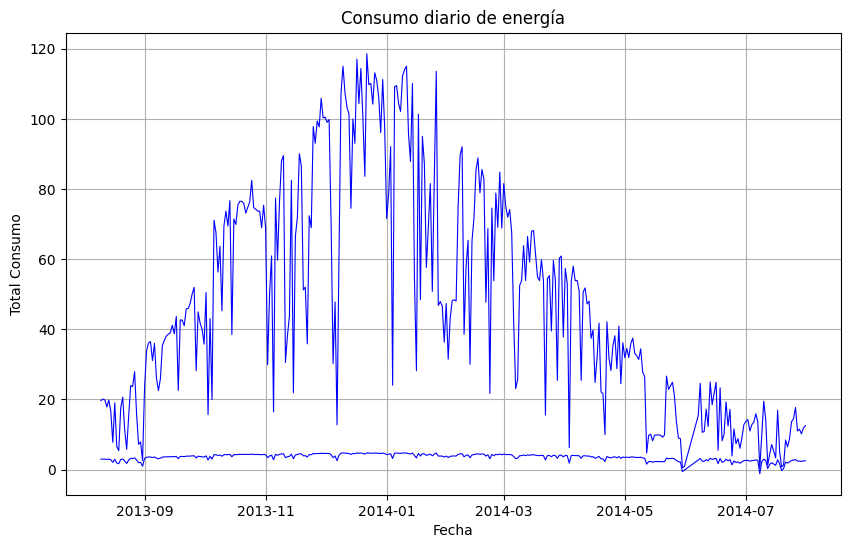

ADF Statistic: -1.1286273015014916
p-value: 0.7035217247002263
Critical Values:
	1%: -3.4499043309021955
	5%: -2.870154885338925
	10%: -2.5713597190254385
La serie no es estacionaria


In [27]:
from statsmodels.tsa.stattools import adfuller
varSerieTmp = 'balance_consumo'
line = 0.8
plt.figure(figsize=(10, 6))
plt.plot(dfg, color='blue', linewidth=line)
plt.title('Consumo diario de energía')
plt.xlabel('Fecha')
plt.ylabel('Total Consumo')
plt.grid(True)
plt.show()

evaluar_adfuller(dfg[varSerieTmp])


In [29]:
dfg['balance_consumo_diff'] = dfg['balance_consumo'].diff().dropna()
evaluar_adfuller(dfg['balance_consumo_diff'].diff().dropna())

ADF Statistic: -9.719406173683991
p-value: 9.633647128790295e-17
Critical Values:
	1%: -3.4503224123605194
	5%: -2.870338478726661
	10%: -2.571457612488522
La serie es estacionaria


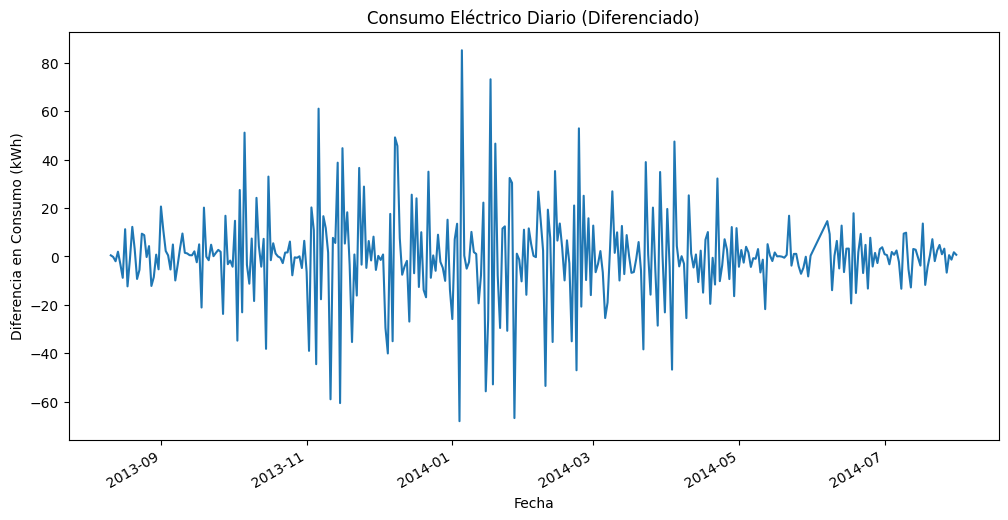

In [54]:
dfg['balance_consumo_diff'].plot(title='Consumo Eléctrico Diario (Diferenciado)', figsize=(12, 6))
plt.xlabel('Fecha')
plt.ylabel('Diferencia en Consumo (kWh)')
plt.show()

In [55]:
train_size = int(len(dfg) * 0.8)
train, test = dfg[:train_size], dfg[train_size:]

In [58]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
def evaluate_ACF(df, pMmodelo):
  Cols = {
    'q': [],
    'AIC': []
  }
  df_eval_ACF  = pd.DataFrame(Cols)
  for q_value in range(5):
    if pMmodelo=='SARIMA':
      model = SARIMAX(df, order=(1, 1, q_value), seasonal_order=(1, 1, 1, 7))
      model_fit = model.fit(disp=False)
    if pMmodelo=='ARIMA':
      model = ARIMA(df, order=(0, 1, q_value))
      model_fit = model.fit()
    aic =  model_fit.aic
    nuevo_registro = pd.DataFrame({'q': [q_value],'AIC':[aic]})
    df_eval_ACF = pd.concat([df_eval_ACF, nuevo_registro])
  df_eval_ACF['q'] = df_eval_ACF['q'].astype(int)
  df_eval_ACF = df_eval_ACF.sort_values(by='AIC')
  return df_eval_ACF

def evaluate_PACF(df, pMmodelo):
  Cols = {
    'p': [],
    'AIC': []
  }
  df_eval_PACF  = pd.DataFrame(Cols)
  for p_value in range(5):
    if pMmodelo=='SARIMA':
      model = SARIMAX(df, order=(p_value, 1, 1), seasonal_order=(1, 1, 1, 7))
      model_fit = model.fit(disp=False)
    if pMmodelo=='ARIMA':
      model = ARIMA(df, order=(p_value, 1, 0))
      model_fit = model.fit()
    aic =  model_fit.aic
    nuevo_registro = pd.DataFrame({'p': [p_value],'AIC':[aic]})
    df_eval_PACF = pd.concat([df_eval_PACF, nuevo_registro])
  df_eval_PACF['p'] = df_eval_PACF['p'].astype(int)
  df_eval_PACF = df_eval_PACF.sort_values(by='AIC')
  return df_eval_PACF


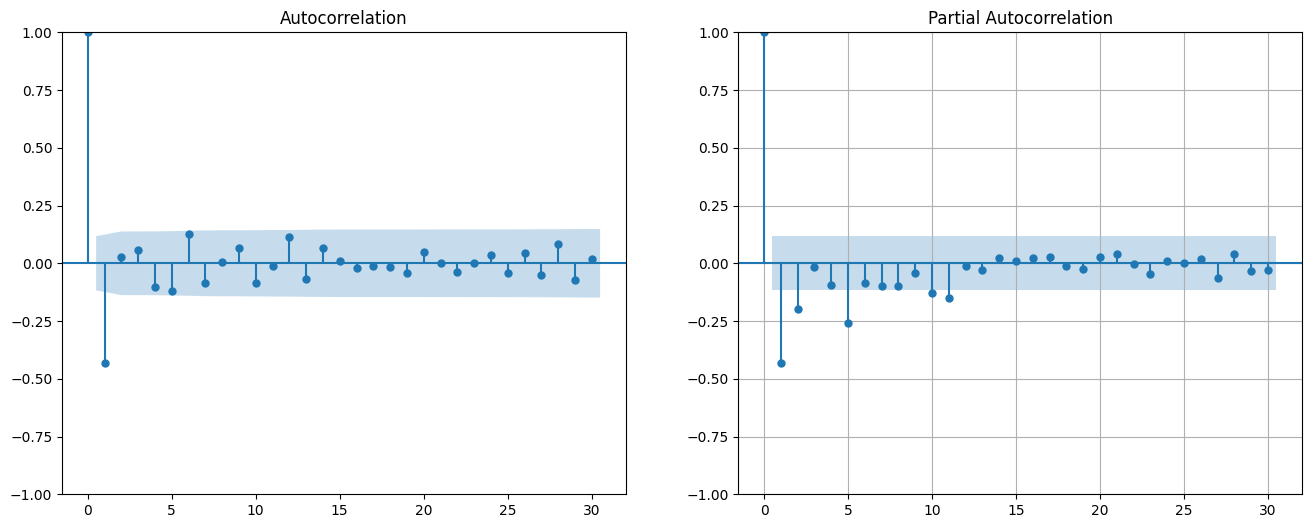

In [62]:
# Análisis ACF y PACF
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(train['balance_consumo_diff'].dropna(), lags=30, ax=ax[0])
plt.grid(True)
plot_pacf(train['balance_consumo_diff'].dropna(), lags=30, ax=ax[1])
plt.grid(True)
plt.show()

##**ARIMA**

In [63]:
evaluate_ACF(train['balance_consumo_diff'].dropna(),'ARIMA')

,q,AIC
0,4,2401.356818
0,3,2406.666839
0,2,2409.036372
0,1,2479.700979
0,0,2763.589857


In [64]:
evaluate_PACF(train['balance_consumo_diff'].dropna(),'ARIMA')

,p,AIC
0,4,2504.072420
0,3,2505.665769
0,2,2527.122282
0,1,2607.577606
0,0,2763.589857


In [65]:
# Ajustar el modelo ARIMA
q = 4
p = 4
model = ARIMA(train['balance_consumo'], order=(p, 1, q))  # (p, d, q) donde p=5, d=1, q=0
model_fit = model.fit()

# Hacer predicciones
forecast = model_fit.forecast(steps=len(test))
forecast_index = test.index

print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:        balance_consumo   No. Observations:                  279
Model:                 ARIMA(4, 1, 4)   Log Likelihood               -1197.003
Date:                Sun, 19 May 2024   AIC                           2412.006
Time:                        16:16:23   BIC                           2444.655
Sample:                    08-10-2013   HQIC                          2425.104
                         - 05-15-2014                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2016      0.103     -1.961      0.050      -0.403   -6.06e-05
ar.L2          0.3315      0.068      4.888      0.000       0.199       0.464
ar.L3          0.9113      0.051     17.877      0.0

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
varSerieTmp = 'balance_consumo'
# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(test['balance_consumo'], forecast)
# Calcular el Error Porcentual Absoluto Medio (MAPE)
mape = mean_absolute_percentage_error(test['balance_consumo'], forecast)

print(f'MSE: {mse}')
print(f'MAPE: {mape}')

MSE: 822.3027076821398
MAPE: 7.43804898973328


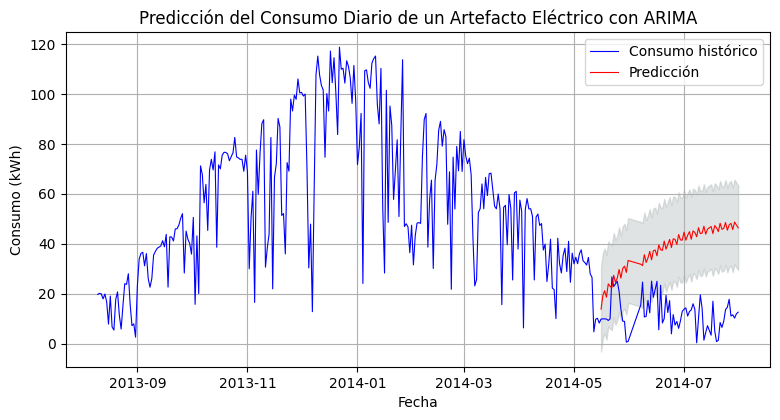

In [69]:
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split

line = 0.8
varSerieTmp = 'balance_consumo'
# Dividir los datos en conjuntos de entrenamiento y prueba

plt.figure(figsize=(20, 20))
i  = 1
plt.subplot(4, 2, i)
# Visualizar las predicciones
plt.plot(dfg.index, dfg[varSerieTmp], label='Consumo histórico', color='blue', linewidth=line)
plt.plot(forecast_index, forecast, label='Predicción', color='red', linewidth=line)
plt.fill_between(forecast_index, forecast - 1.96 * np.std(forecast), forecast + 1.96 * np.std(forecast), color='#99A3A4', alpha=0.3)
plt.title('Predicción del Consumo Diario de un Artefacto Eléctrico con ARIMA')
plt.xlabel('Fecha')
plt.ylabel('Consumo (kWh)')
plt.legend()
plt.grid(True)

plt.show()

##**SARIMA**

In [70]:
evaluate_ACF(train['balance_consumo_diff'],'SARIMA')

,q,AIC
0,2,2380.631940
0,4,2387.182639
0,3,2390.339010
0,1,2406.978890
0,0,2580.614389


In [71]:
evaluate_PACF(train['balance_consumo_diff'],'SARIMA')

,p,AIC
0,2,2397.348259
0,4,2399.008731
0,3,2399.144505
0,1,2406.978890
0,0,2457.032691


In [72]:
# Ajustar el modelo ARIMA
q = 2
p = 2
# Ajustar el modelo SARIMA
# Parámetros SARIMA: (p, d, q) x (P, D, Q, s)
# donde s es la periodicidad de la componente estacional (aquí, 30 días aproximadamente un mes)
model = SARIMAX(train['balance_consumo'], order=(p, 1, q), seasonal_order=(1, 1, 1, 30))
model_fit = model.fit(disp=False)

# Hacer predicciones
forecast = model_fit.forecast(steps=len(test))
forecast_index = test.index

print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                      balance_consumo   No. Observations:                  279
Model:             SARIMAX(2, 1, 2)x(1, 1, [1], 30)   Log Likelihood               -1097.570
Date:                              Sun, 19 May 2024   AIC                           2209.139
Time:                                      16:22:32   BIC                           2233.733
Sample:                                  08-10-2013   HQIC                          2219.040
                                       - 05-15-2014                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6477      0.142     -4.563      0.000      -0.926      -0.370
ar.L2          0.28

In [73]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(test['balance_consumo'], forecast)
# Calcular el Error Porcentual Absoluto Medio (MAPE)
mape = mean_absolute_percentage_error(test['balance_consumo'], forecast)

print(f'MSE: {mse}')
print(f'MAPE: {mape}')

MSE: 144.36686905103332
MAPE: 2.8758705077775777


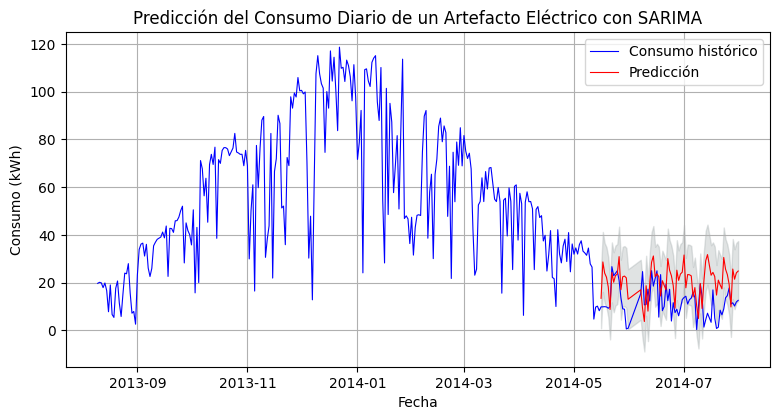

In [74]:
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.model_selection import train_test_split

# Dividir los datos en conjuntos de entrenamiento y prueba
line = 0.8

varSerieTmp = 'balance_consumo'

# Visualizar las predicciones
plt.figure(figsize=(20, 20))
i  = 1
plt.subplot(4, 2, i)
plt.plot(dfg.index, dfg[varSerieTmp], label='Consumo histórico', color='blue', linewidth=line)
plt.plot(forecast_index, forecast, label='Predicción', color='red', linewidth=line)
plt.fill_between(forecast_index, forecast - 1.96 * np.std(forecast), forecast + 1.96 * np.std(forecast), color='#99A3A4', alpha=0.3)
plt.title('Predicción del Consumo Diario de un Artefacto Eléctrico con SARIMA')
plt.xlabel('Fecha')
plt.ylabel('Consumo (kWh)')
plt.legend()
plt.grid(True)
plt.show()

##**AUTO-ARIMA**

In [75]:
import pmdarima as pm

varSerieTmp = 'balance_consumo'
line = 0.8
# Aplicar el modelo AUTO ARIMA
model = pm.auto_arima(train[varSerieTmp], seasonal=True, trace=True,stationary=False, max_p=50, max_d=50, max_q=50, suppress_warnings=True)
#model = pm.auto_arima(train[varSerieTmp], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
model_fit = model.fit(train[varSerieTmp])

# Predecir los próximos valores
forecast = model_fit.predict(n_periods=len(test))
forecast_index = test.index
print(model_fit.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2400.920, Time=0.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2481.965, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2426.624, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2409.167, Time=0.23 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2479.966, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=2400.802, Time=0.38 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=2406.803, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2403.075, Time=0.23 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=2398.405, Time=0.74 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=2402.303, Time=0.49 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=2394.204, Time=1.05 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=2395.346, Time=1.53 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=2394.686, Time=1.16 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=2394.597, Time=0.71 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept

In [76]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
varSerieTmp = 'balance_consumo'
# Calcular el Error Cuadrático Medio (MSE)
mse = mean_squared_error(test[varSerieTmp], forecast)
# Calcular el Error Porcentual Absoluto Medio (MAPE)
mape = mean_absolute_percentage_error(test[varSerieTmp], forecast)

print(f'MSE: {mse}')
print(f'MAPE: {mape}')

MSE: 121.34701767528601
MAPE: 3.52768277212296


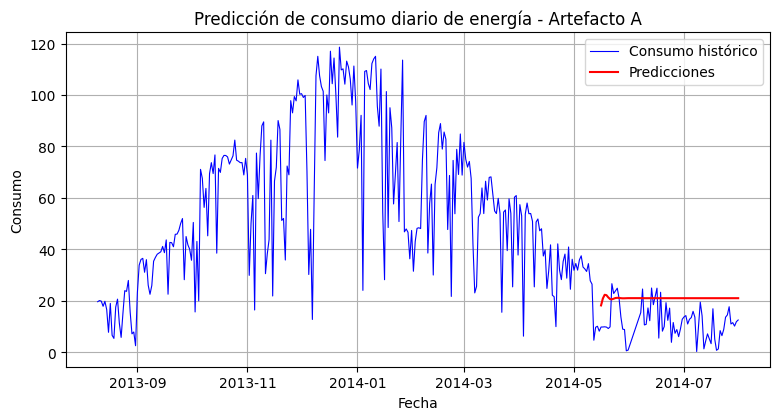

In [77]:
# Graficar la serie original y la predicción

#forecast_index = pd.date_range(start=dfg.index[-1] + pd.Timedelta(days=1), periods=len(dfg), freq='D')
#forecast_df = pd.DataFrame(forecast, index=forecast_index, columns=['forecast'])

plt.figure(figsize=(20, 20))
i  = 1
plt.subplot(4, 2, i)
plt.plot(dfg.index, dfg[varSerieTmp], label='Consumo histórico', color='blue', linewidth=line)
#plt.plot(forecast.index, forecast, label='Predicción', color='red', linewidth=line)
#plt.plot(forecast_df, label='Predicción', color='red')
plt.plot(forecast_index, forecast, label='Predicciones', color='red')
plt.title('Predicción de consumo diario de energía - Artefacto A')
plt.xlabel('Fecha')
plt.ylabel('Consumo')
plt.legend()
plt.grid(True)
plt.show()

#**Analisis Resultados Modelos Regresion**

In [78]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold
cv = KFold(n_splits = 10, shuffle = False) #

##**RandomForestRegressor**

In [ ]:
df_cluster_general.dtypes

In [102]:
v_indice = ['fecha']
v_consumidor = ['Consumidor']
v_regresor = ['Total Consumo','Cocina','Lavanderia','Continuo','EspacioComun',	'Entretenimiento','Producer']
v_target = ['balance_consumo']
df_regresor = df_cluster_general[df_cluster_general['Is_producer']==True][v_indice + v_consumidor + v_regresor]
df_regresor = df_regresor[(df_regresor['Producer']!=0) & (df_regresor['Producer']>df_regresor['Total Consumo'] )]
df_regresor['balance_consumo'] = df_regresor['Producer'] - df_regresor['Total Consumo']
df_regresor = df_regresor.groupby(['fecha','Consumidor']).sum()
df_regresor = pd.DataFrame(df_regresor)
df_regresor = df_regresor.reset_index()
df_regresor = df_regresor.groupby(['fecha'])[v_target + v_regresor].mean()
df_prooducer = pd.DataFrame(df_prooducer)
df_regresor = df_regresor.reset_index()

In [103]:
train_size = int(len(df_regresor) * 0.8)
train, test = df_regresor[:train_size], df_regresor[train_size:]
train.set_index('fecha', inplace=True)
test.set_index('fecha', inplace=True)
#train = train.drop(columns=['fecha'])
#test = test.drop(columns=['fecha'])

In [142]:
def report_grid_searh(df):
  ols = {
    'bootstrap': [],
    'max_depth': [] ,
    'max_features': [] ,
    'min_samples_leaf': [] ,
    'min_samples_split': [] ,
    'n_estimators':[]
  }
  df_eval_grid_search  = pd.DataFrame(Cols)

  df_eval_grid_search['bootstrap'] = df_eval_grid_search['bootstrap'].astype(bool)
  df_eval_grid_search['max_depth'] = df_eval_grid_search['max_depth'].astype(int)
  df_eval_grid_search['min_samples_leaf'] = df_eval_grid_search['max_depth'].astype(int)
  df_eval_grid_search['min_samples_split'] = df_eval_grid_search['min_samples_split'].astype(int)
  df_eval_grid_search['n_estimators'] = df_eval_grid_search['n_estimators'].astype(int)
  n_top = 5
  for i in range(1, n_top + 1):
    candidates = np.flatnonzero(df.cv_results_['rank_test_score'] == i)
    for candidate in candidates:
      param = df.cv_results_['params'][candidate]
      vbootstrap = param['bootstrap']
      vmax_depth = param['max_depth']
      vmax_features = param['max_features']
      vmin_samples_leaf = param['min_samples_leaf']
      vmin_samples_split = param['min_samples_split']
      vn_estimators = param['n_estimators']
      nuevo_registro = pd.DataFrame({'bootstrap': [vbootstrap],'max_depth':[vmax_depth],'max_features':[vmax_features],'min_samples_leaf':[vmin_samples_leaf] ,'min_samples_split':[vmin_samples_split] ,'n_estimators':[vn_estimators] })
      df_eval_grid_search = pd.concat([df_eval_grid_search, nuevo_registro])
  return df_eval_grid_search

## **Grid Search**

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import RandomizedSearchCV
regressor = RandomForestRegressor(random_state=0)
regressor

RandomForestRegressor(random_state=0)

In [107]:
param_grid = {
    'n_estimators': [100, 200, 300],             # Número de árboles en el bosque
    'max_features': ['auto', 'sqrt', 'log2'],    # Número de características consideradas para dividir un nodo
    'max_depth': [10, 20, 30, None],             # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],             # Número mínimo de muestras requeridas para dividir un nodo
    'min_samples_leaf': [1, 2, 4] ,              # Número mínimo de muestras requeridas en una hoja
    "bootstrap": [False]                         # Method of selecting samples for training each tree

}
grid_regres = GridSearchCV(estimator = regressor, param_grid= param_grid, cv=5)
grid_regres.fit(X = train.drop(['balance_consumo'], axis=1), y = train['balance_consumo'])


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=0),
             param_grid={'bootstrap': [False], 'max_depth': [10, 20, 30, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [143]:
report_grid_searh(grid_regres)
#report(grid_regres.cv_results_, n_top = 5)

,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators
0,False,10,auto,1,5,100
0,False,10,auto,1,5,200
0,False,10,auto,1,5,300
0,False,10,auto,2,5,100
0,False,20,auto,2,5,100
0,False,30,auto,2,5,100
0,False,None,auto,2,5,100


In [144]:
grid_regres.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [118]:
# choose the best
vTarget = 'balance_consumo'
best_random = grid_regres.best_estimator_
# fit and predict
best_random.fit( X = train.drop([vTarget], axis=1), y = train[vTarget])
y_pred = best_random.predict(X = test.drop([vTarget], axis = 1,))

# EVALUATE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test[vTarget], y_pred)
print ('MAE', mae)

MAE 1.5156337238483015


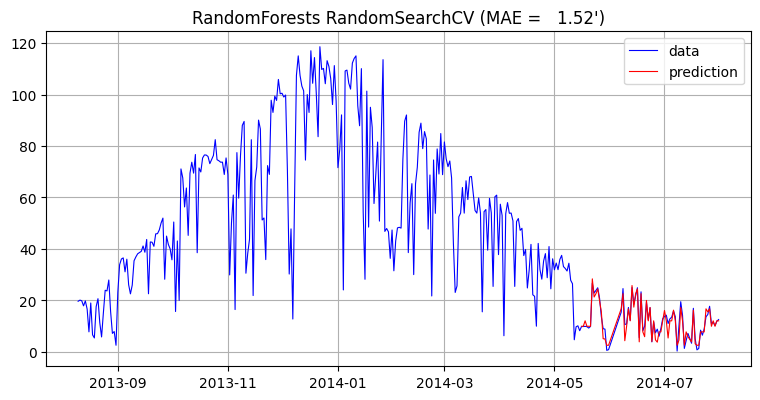

In [119]:
from sklearn.metrics import mean_absolute_error
import numpy as np

vTarget = 'balance_consumo'
line = 0.8
# x axis for plotting
#xx = np.stack(i for i in range(test[vTarget].shape[0]))
plt.figure(figsize=(20, 20))
i  = 1
plt.subplot(4, 2, i)
plt.plot(df_regresor['fecha'], df_regresor[vTarget], label='data', color='blue', linewidth=line)
plt.plot(test.index, y_pred, label='prediction', color='red', linewidth=line)
plt.axis('tight')
plt.legend()
plt.title("RandomForests RandomSearchCV (MAE = %6.2f')" % ( mae))
plt.grid(True)
plt.show()